In [1]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:/Users/User/Downloads/Loan_default.csv')

In [3]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
df.shape

(255347, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


In [7]:
df.duplicated().sum()

0

In [8]:
df_num = df.select_dtypes(exclude = ['object']).drop(['Default','DTIRatio','LoanTerm'], axis = 1)
df_num

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate
0,56,85994,50587,520,80,4,15.23
1,69,50432,124440,458,15,1,4.81
2,46,84208,129188,451,26,3,21.17
3,32,31713,44799,743,0,3,7.07
4,60,20437,9139,633,8,4,6.51
...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11
255343,32,51953,189899,511,14,2,11.55
255344,56,84820,208294,597,70,3,5.29
255345,42,85109,60575,809,40,1,20.90


In [9]:
df['NumCreditLines'].unique()

array([4, 1, 3, 2], dtype=int64)

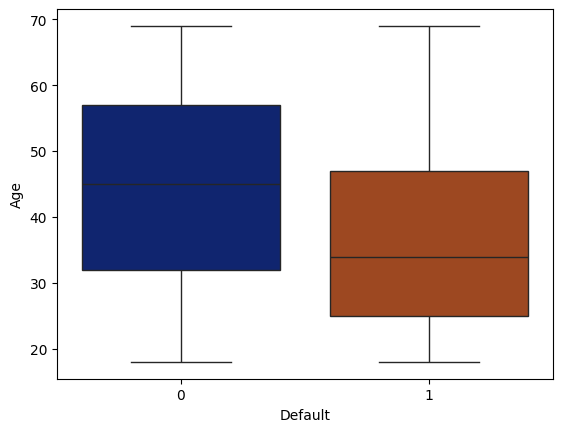

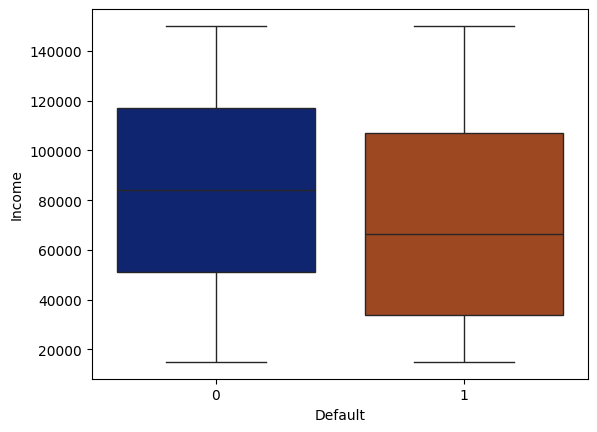

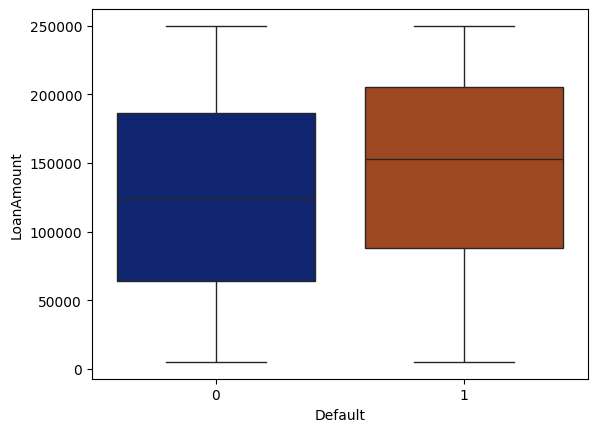

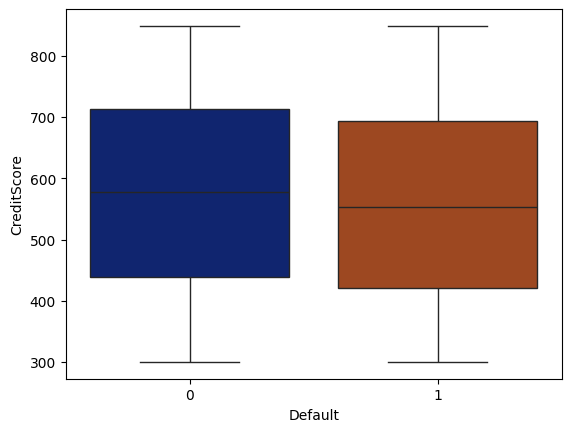

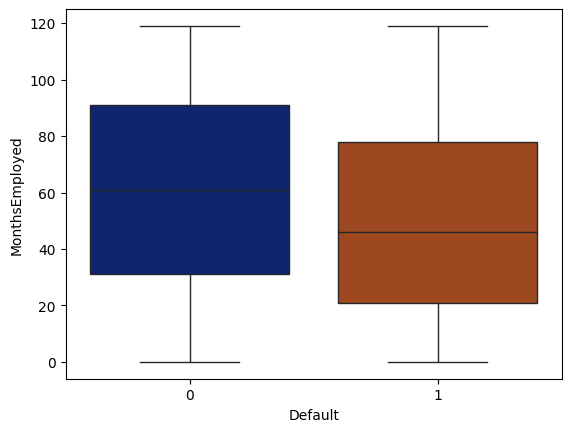

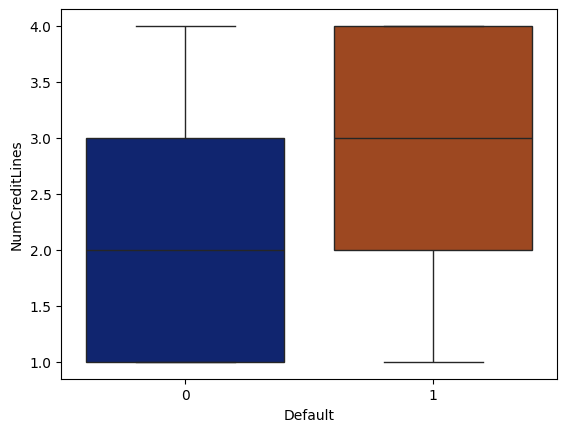

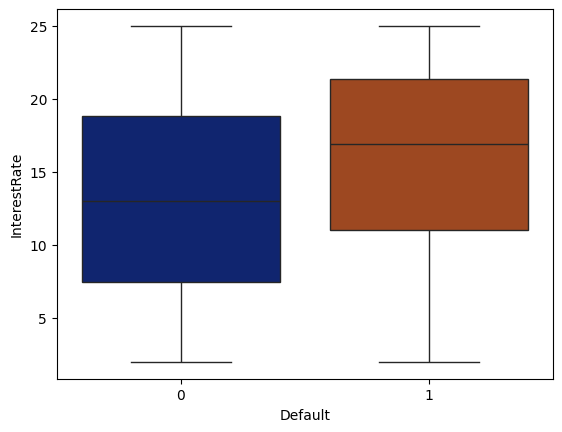

In [10]:
for col in df_num:
    sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'dark')
    plt.show()

In [11]:
df_num.corr()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import tree

In [13]:
# dropping Loan ID
df.drop('LoanID', axis = 1 , inplace = True)

In [14]:
x = df.drop('Default', axis = 1)
y = df['Default']

In [15]:
# filtering only non numeric col
df_obj = df.select_dtypes(include=['object'])

In [16]:
enc = LabelEncoder()
for col in df_obj:
    x[col] = enc.fit_transform(x[col])

In [17]:
x.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [19]:
x[x.columns] = scaler.fit_transform(x[x.columns])

In [20]:
x.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,0.745098,0.525885,0.186070,0.400729,0.672269,1.000000,0.575217,0.50,0.4250,0.000000,0.0,0.0,1.0,1.0,1.00,1.0
1,1.000000,0.262461,0.487512,0.287796,0.126050,0.000000,0.122174,1.00,0.7250,0.666667,0.0,0.5,0.0,0.0,1.00,1.0
2,0.549020,0.512656,0.506892,0.275046,0.218487,0.666667,0.833478,0.25,0.2625,0.666667,1.0,0.0,1.0,1.0,0.00,0.0
3,0.274510,0.123801,0.162446,0.806922,0.000000,0.666667,0.220435,0.25,0.1625,0.333333,0.0,0.5,0.0,0.0,0.25,0.0
4,0.823529,0.040274,0.016894,0.606557,0.067227,1.000000,0.196087,0.75,0.7875,0.000000,1.0,0.0,0.0,1.0,0.00,0.0


In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
x_train.shape, x_test.shape

((204277, 16), (51070, 16))

Samping technique - SMOTE
For each sample in the minority class, SMOTE identifies its nearest neighbors (usually k-nearest neighbors).

Generate synthetic samples: It then creates new synthetic samples by interpolating between the minority class sample and its neighbors. These synthetic samples are added to the dataset, improving the balance between classes.

In [23]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=1)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Apply SMOTE only to the training data
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=4, random_state=1, criterion='entropy'),
    'Logistic Regression': LogisticRegression(random_state=1),
    'Random Forest': RandomForestClassifier(random_state=1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=1),
    'XGBoost': xgb.XGBClassifier(random_state=1)
}

# List to store model metrics
models_metrics = []

# Evaluate each model
for name, model in models.items():
    # Fit the model on the resampled training set
    model.fit(x_train_smote, y_train_smote)

    # Predict on the test data (unbalanced original test set)
    y_pred = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate the metrics
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    auc = round(roc_auc_score(y_test, y_pred_proba), 4) if y_pred_proba is not None else 'N/A'

    # Append the metrics to the list
    models_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall,
        "AUC": auc
    })

# Convert the results into a DataFrame for better visualization
metrics_df = pd.DataFrame(models_metrics)

# Print the results table
metrics_df


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Train the XGBoost model
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=1)
xgb_model.fit(x_train_smote, y_train_smote)

# Make predictions
y_pred = xgb_model.predict(x_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'f1_score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test,y_pred))

In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix

# Function to calculate sensitivity, specificity, and accuracy
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    return sensitivity, specificity, accuracy

# Define a range of cutoff thresholds
cutoff_values = np.linspace(0, 1, 100)

# Initialize lists to store sensitivity, specificity, and accuracy for each cutoff
sensitivities = []
specificities = []
accuracies = []

# Calculate metrics for each cutoff threshold
for cutoff in cutoff_values:
    preds = (xgb_model.predict_proba(x_test)[:, 1] > cutoff).astype(int)
    sensitivity, specificity, accuracy = calculate_metrics(y_test, preds)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    accuracies.append(accuracy)

# Create a Plotly figure
fig = go.Figure()

# Add traces for sensitivity, specificity, and accuracy
fig.add_trace(go.Scatter(x=cutoff_values, y=sensitivities,
                         mode='lines', name='Sensitivity',
                         line=dict(color='blue')))
fig.add_trace(go.Scatter(x=cutoff_values, y=specificities,
                         mode='lines', name='Specificity',
                         line=dict(color='green')))
fig.add_trace(go.Scatter(x=cutoff_values, y=accuracies,
                         mode='lines', name='Accuracy',
                         line=dict(color='orange')))

# Update layout
fig.update_layout(title='Cutoff Threshold vs Sensitivity, Specificity, and Accuracy',
                  xaxis_title='Cutoff Threshold',
                  yaxis_title='Metric Value',
                  legend_title='Metrics',
                  template='plotly_white')

# Show the plot
fig.show()

Here, a threshold of 0.24 is applied to classify instances. If the predicted probability of defaulting is greater than 0.24, it will be classified as 1 (default), otherwise as 0 (no default).